In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics.cluster import adjusted_rand_score

import service
from clustering.KMeans import KMeans
from clustering.KMedoids import KMedoids
from clustering.DBSCAN import DBSCAN
from clustering.AgglomerativeClustering import AgglomerativeClustering

In [2]:
sns.set_style('darkgrid')

### data_1

In [3]:
df = pd.read_csv('data/data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       10 non-null     int64 
 1   y       10 non-null     int64 
 2   label   10 non-null     object
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
X, labels = df.drop(columns='label'), df['label']
X.shape, labels.shape

((10, 2), (10,))

In [5]:
X = X[['x', 'y']].to_numpy()

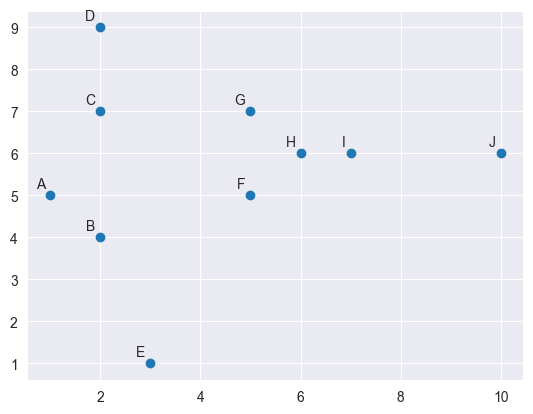

In [6]:
service.plot_raw_data(X, labels)

#### KMeans

In [7]:
n_clusters = 3
init = [[1, 5], [5, 5], [10, 6]]
max_iter = 10
random_state = 42

In [8]:
clusterer = KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [9]:
clusterer.n_iter_

2

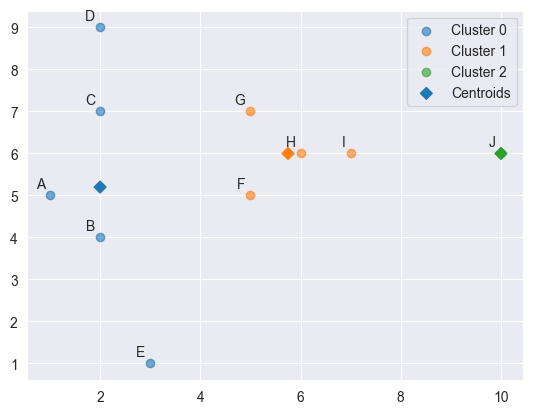

In [10]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

Compare with similar scikit-learn model

In [11]:
sk_clusterer = sklearn.cluster.KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
sk_clusterer.fit(X);

In [12]:
sk_clusterer.n_iter_

2

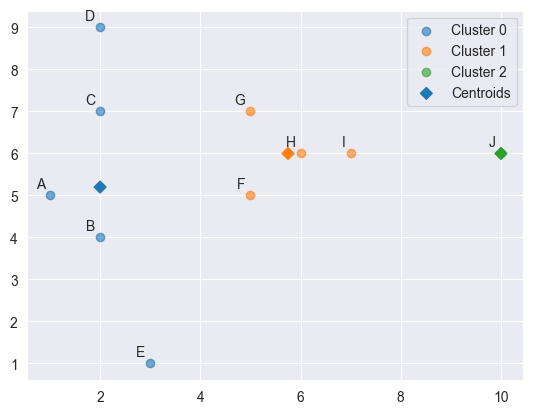

In [13]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
    cluster_centers=sk_clusterer.cluster_centers_,
)

In [14]:
assert adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_) == 1.0
assert np.allclose(clusterer.inertia_, sk_clusterer.inertia_)

#### KMedoids

In [15]:
n_clusters = 3
init = [[5, 5], [5, 7], [6, 6]]
max_iter = 10
random_state = 42

In [16]:
clusterer = KMedoids(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [17]:
clusterer.n_iter_

2

In [18]:
clusterer.cluster_center_indices_

array([1, 2, 8])

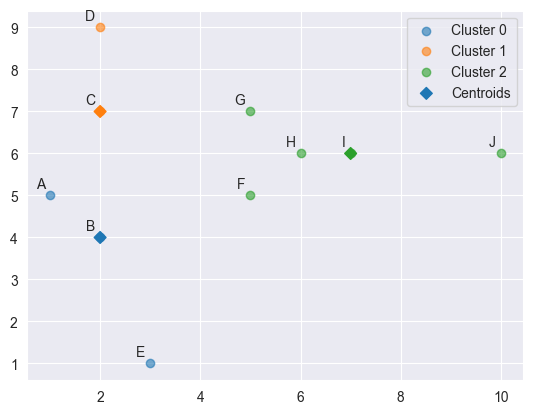

In [19]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

#### DBSCAN

In [20]:
eps = 2.5
min_samples = 3

In [21]:
clusterer = DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
clusterer.fit(X);

In [22]:
clusterer.core_sample_indices_

array([0, 2, 5, 6, 7, 8])

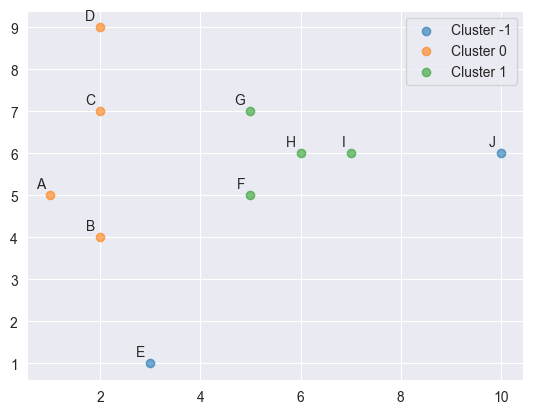

In [23]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

Compare with similar scikit-learn model

In [24]:
sk_clusterer = sklearn.cluster.DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
sk_clusterer.fit(X);

In [25]:
sk_clusterer.core_sample_indices_

array([0, 2, 5, 6, 7, 8])

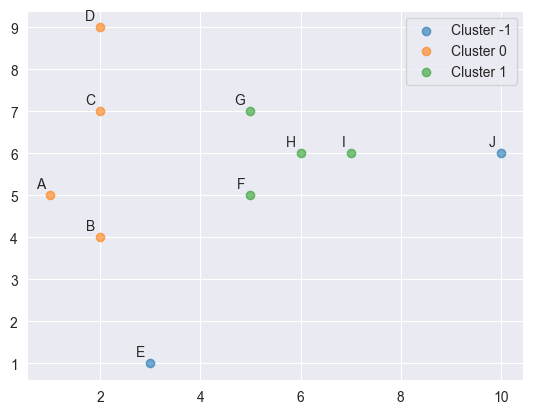

In [26]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

In [27]:
assert adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_) == 1.0

#### AgglomerativeClustering

In [28]:
n_clusters = 3

##### linkage='single'

In [29]:
linkage = 'single'

In [30]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

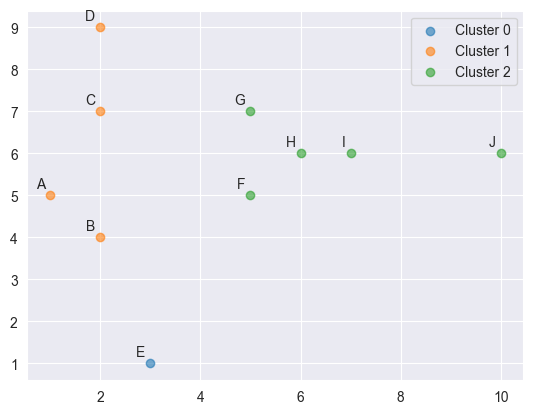

In [31]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

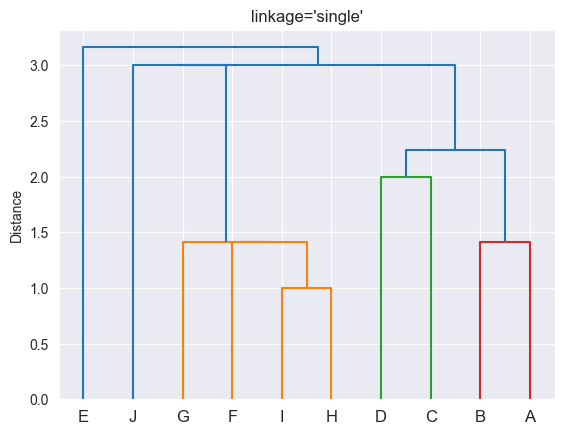

In [32]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [33]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

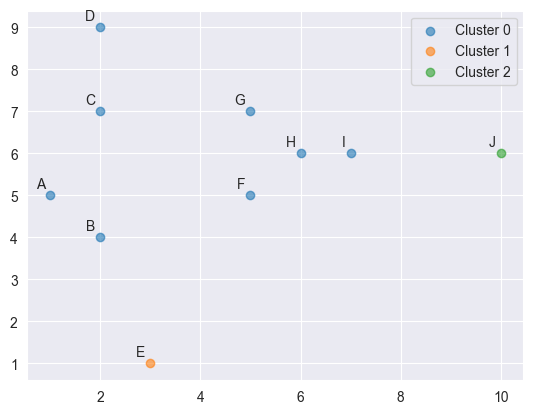

In [34]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

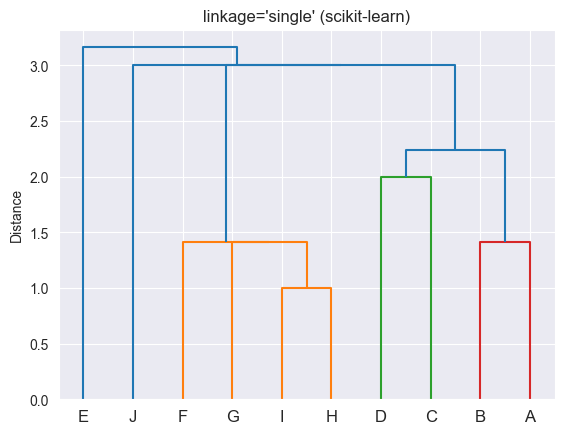

In [35]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [36]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

##### linkage='complete'

In [37]:
linkage = 'complete'

In [38]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

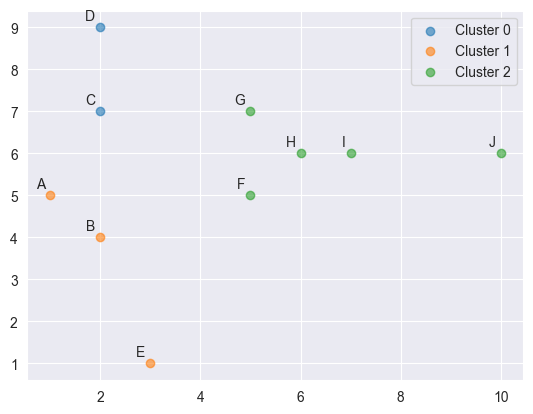

In [39]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

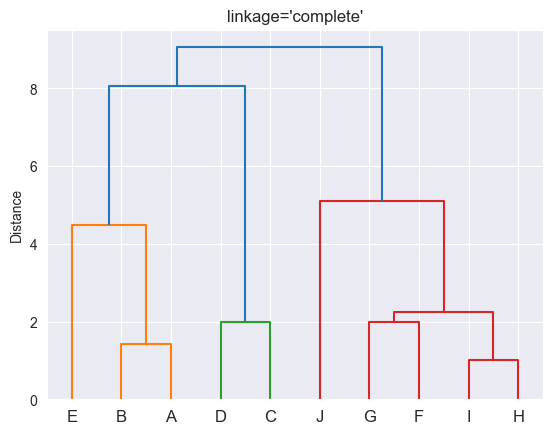

In [40]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [41]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

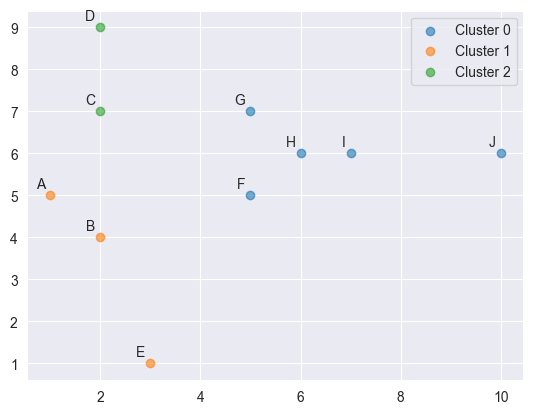

In [42]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

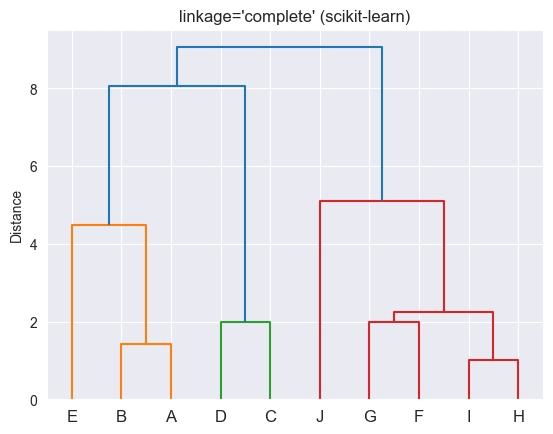

In [43]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [44]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

##### linkage='average'

In [45]:
linkage = 'average'

In [46]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

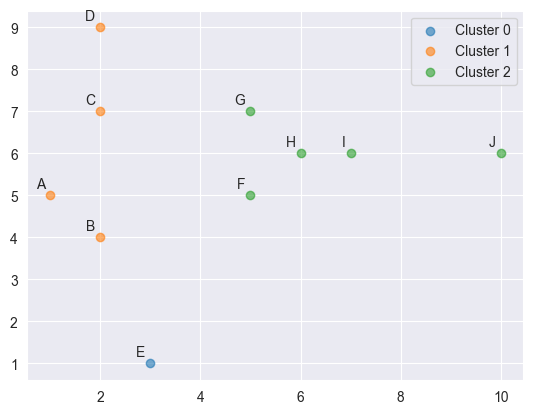

In [47]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

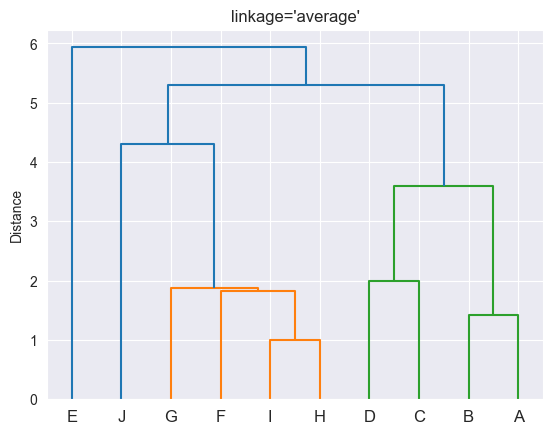

In [48]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [49]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

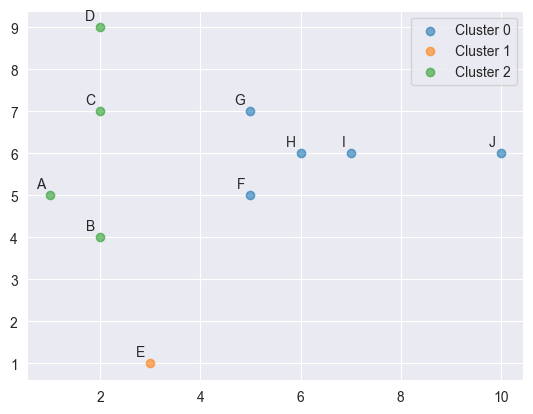

In [50]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

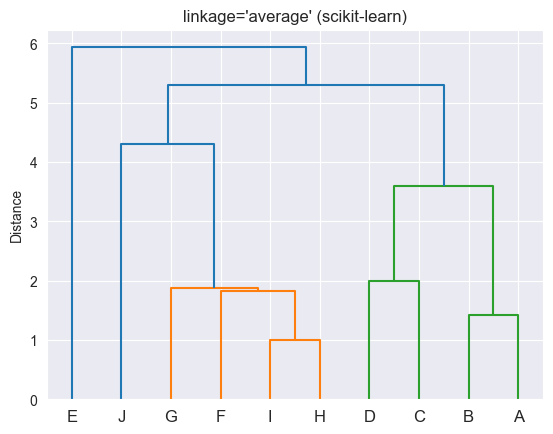

In [51]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [52]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

##### linkage='ward'

In [53]:
linkage = 'ward'

In [54]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

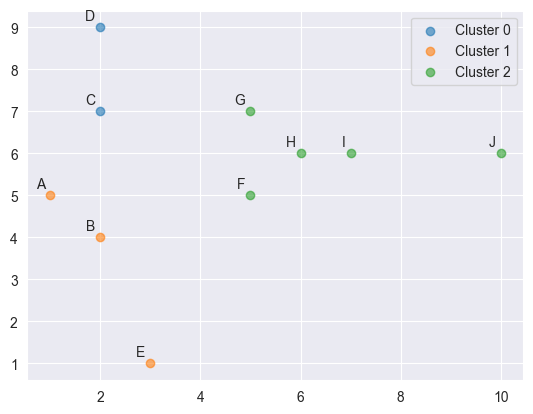

In [55]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

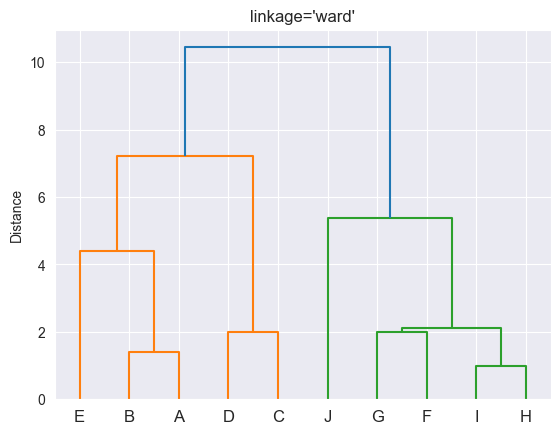

In [56]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [57]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

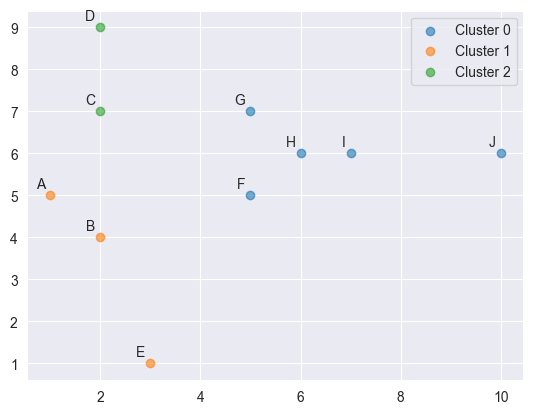

In [58]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

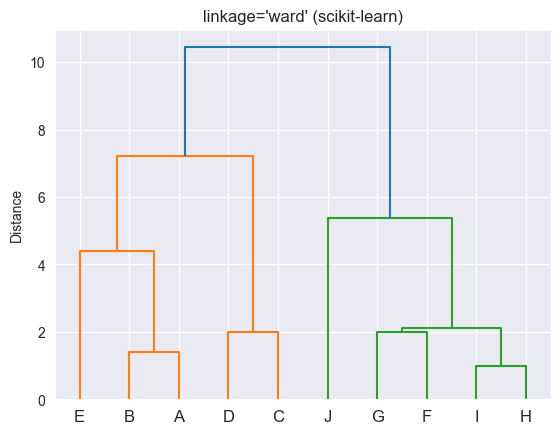

In [59]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [60]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

### More datasets

In [61]:
datasets = service.generate_toy_datasets(n_samples=500)
param_grid = [
    {
        'clusterer': [("KMeans", KMeans(e=0))],
        'sk_clusterer': [("", sklearn.cluster.KMeans(tol=0))],
        'n_clusters': [2],
        'init': [[[-1, -1], [1, 1]]],
        'dataset': datasets,
    },
    {
        'clusterer': [("KMeans", KMeans(e=0))],
        'sk_clusterer': [("", sklearn.cluster.KMeans(tol=0))],
        'n_clusters': [3],
        'init': [[[-1, -1], [0, 0], [1, 1]]],
        'dataset': datasets,
    },
    {
        'clusterer': [("KMedoids", KMedoids(random_state=42))],
        'sk_clusterer': [("", None)],
        'n_clusters': [2, 3, 4],
        'dataset': datasets,
    },
    {
        'clusterer': [("DBSCAN", DBSCAN())],
        'sk_clusterer': [("", sklearn.cluster.DBSCAN())],
        'eps': [0.1, 0.2, 0.4],
        'min_samples': [3, 5, 7],
        'dataset': datasets,
    },
    {
        'clusterer': [("Aggl.", AgglomerativeClustering())],
        'sk_clusterer': [
            ("", sklearn.cluster.AgglomerativeClustering(compute_distances=True))
        ],
        'n_clusters': [2, 3, 4],
        'linkage': ['single', 'complete', 'average', 'ward'],
        'dataset': datasets,
    },
]
grid = sklearn.model_selection.ParameterGrid(param_grid)

len(grid)

156

In [62]:
count_df = pd.DataFrame()
time_df = pd.DataFrame()
for params in grid:
    params = params.copy()
    dataset_str, X = params.pop('dataset')
    clusterer_str, clusterer = params.pop('clusterer')
    _, sk_clusterer = params.pop('sk_clusterer')

    start_time = time.perf_counter()
    clusterer.set_params(**params).fit(X)
    fit_time = time.perf_counter() - start_time

    if sk_clusterer is not None:
        sk_clusterer.set_params(**params).fit(X)
        if clusterer_str == "Aggl.":
            assert np.allclose(clusterer.distances_, sk_clusterer.distances_)
        else:
            assert adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_) == 1.0

    count_val = count_df.get(clusterer_str, {}).get(dataset_str, 0) + 1
    count_df.at[dataset_str, clusterer_str] = count_val
    count_df.fillna(0, inplace=True)

    time_val = time_df.get(clusterer_str, {}).get(dataset_str, 0) + fit_time
    time_df.at[dataset_str, clusterer_str] = time_val
    time_df.fillna(0, inplace=True)
mean_time_df = time_df / count_df

print(f"Total time: {time_df.values.sum():.2f}s")

Total time: 27.38s


In [63]:
count_df

,KMeans,KMedoids,DBSCAN,Aggl.
noisy_circles,2.0,3.0,9.0,12.0
noisy_moons,2.0,3.0,9.0,12.0
varied,2.0,3.0,9.0,12.0
aniso,2.0,3.0,9.0,12.0
blobs,2.0,3.0,9.0,12.0
no_structure,2.0,3.0,9.0,12.0


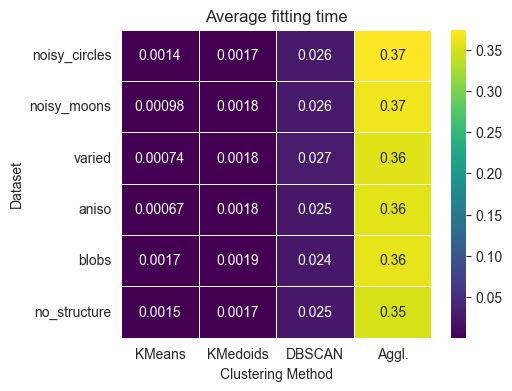

In [64]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    data=mean_time_df,
    cmap='viridis',
    linewidths=0.5,
    annot=True,
    cbar=True,
)

plt.title("Average fitting time")
plt.xlabel("Clustering Method")
plt.ylabel("Dataset")
plt.show()

In [65]:
mean_time_df.mean()

KMeans      0.001173
KMedoids    0.001804
DBSCAN      0.025363
Aggl.       0.360599
dtype: float64

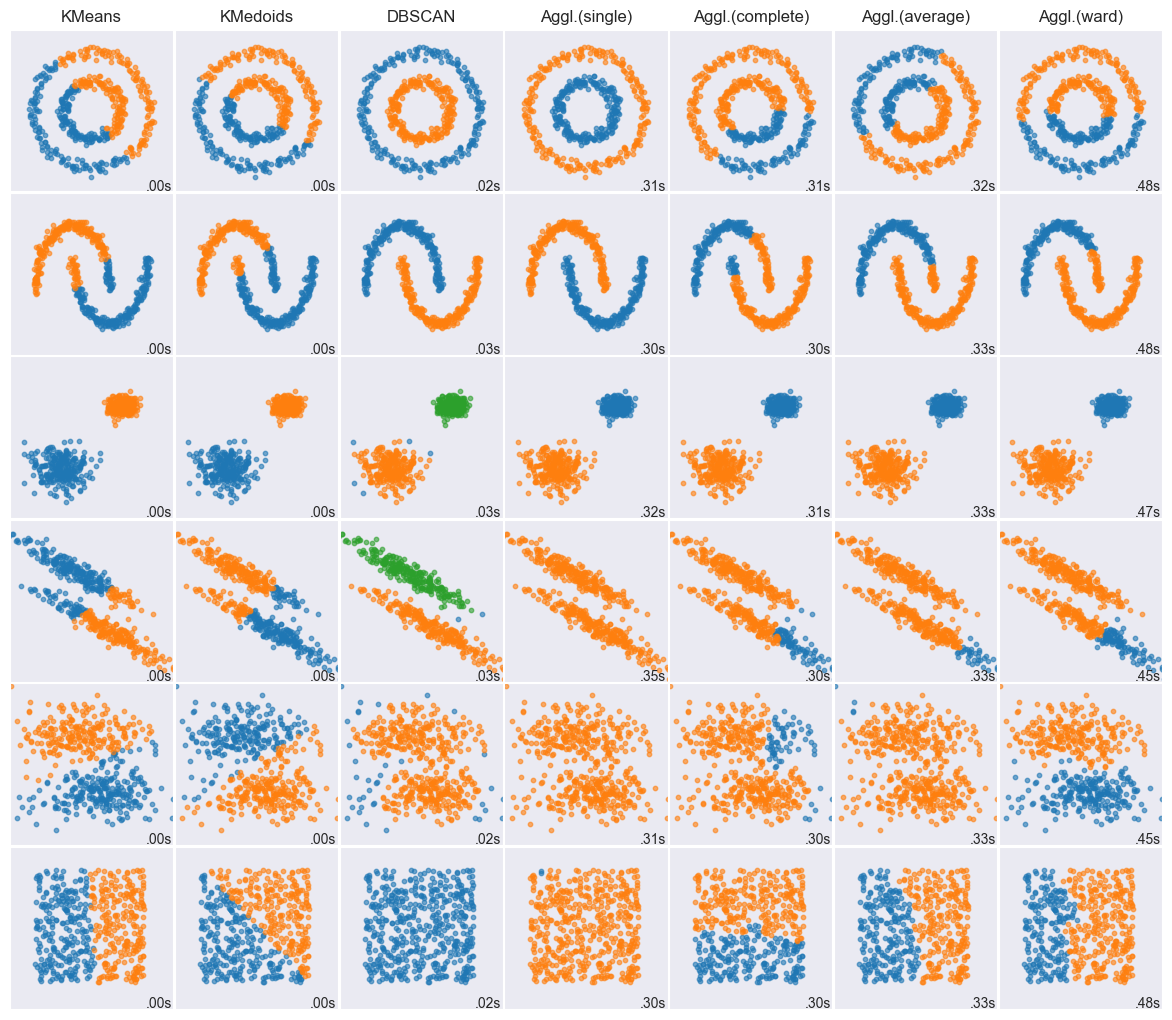

In [66]:
n_clusters = 2
init = [[0, 0], [1, 1]]
clusterers = [
    ("KMeans", KMeans(n_clusters=n_clusters, init=init)),
    ("KMedoids", KMedoids(n_clusters=n_clusters, init=init)),
    ("DBSCAN", DBSCAN(eps=0.3)),
    ("Aggl.(single)", AgglomerativeClustering(n_clusters=n_clusters, linkage='single')),
    ("Aggl.(complete)", AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')),
    ("Aggl.(average)", AgglomerativeClustering(n_clusters=n_clusters, linkage='average')),
    ("Aggl.(ward)", AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')),
]

service.plot_toy_datasets(datasets, clusterers, figsize=(12, 10))

### Country data

In [67]:
df = pd.read_csv('data/country_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [68]:
X = df.drop(columns=['country'])
labels = df['country']
X.shape, labels.shape

((167, 9), (167,))

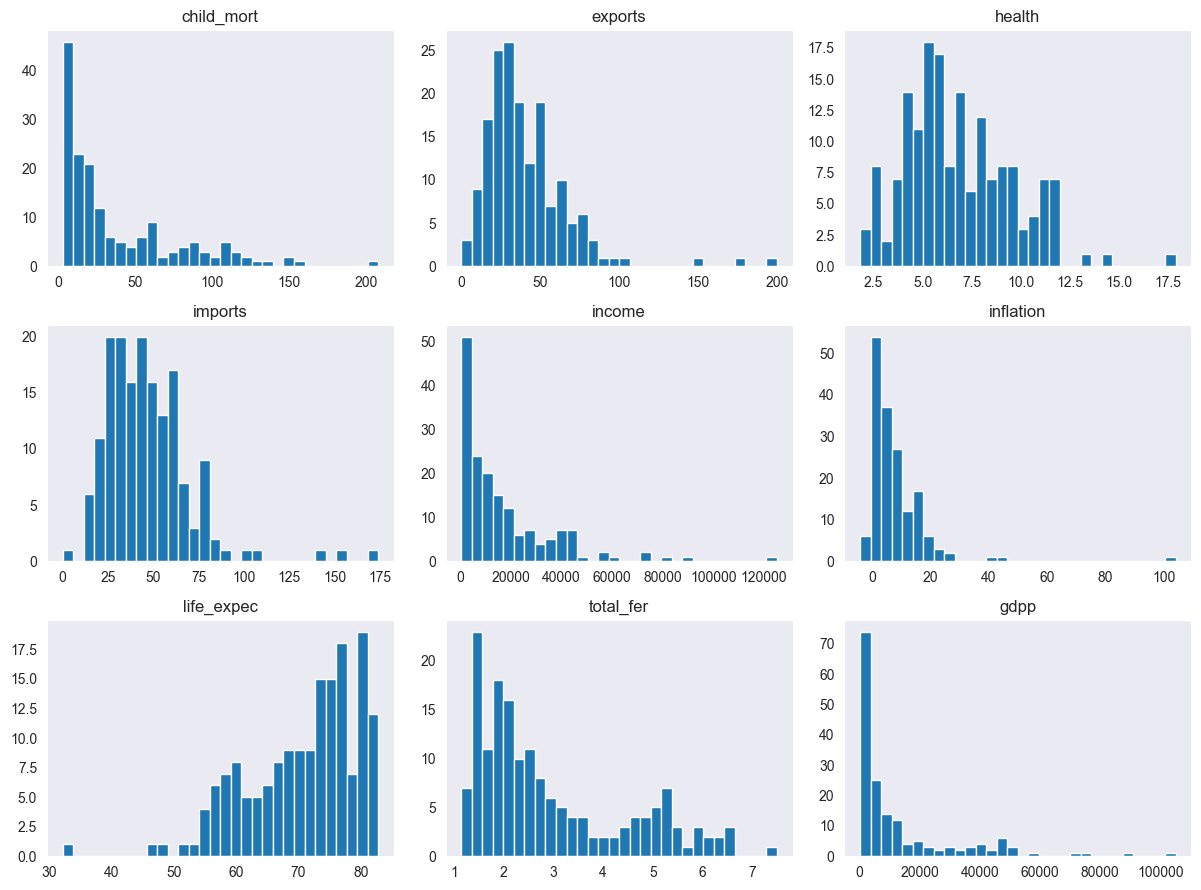

In [69]:
df.hist(figsize=(12, 9), bins=30, grid=False, xrot=0)
plt.tight_layout()
plt.show()

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

X.shape

(167, 2)

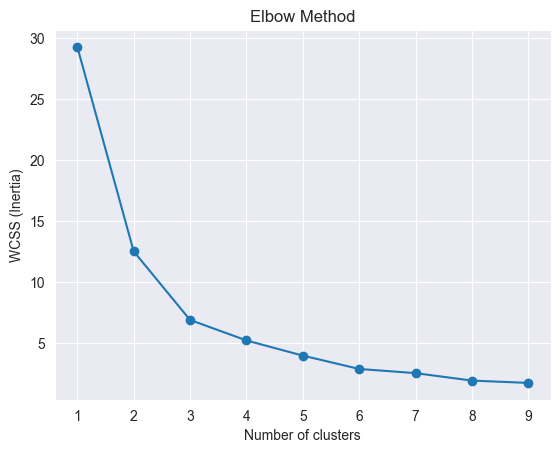

In [71]:
n_range = range(1, 10)
inertia_list = []
for n in n_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(n_range, inertia_list, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [72]:
n_clusters = 3

In [73]:
clusterer = KMeans(n_clusters=n_clusters, random_state=42)
clusterer.fit(X);

In [74]:
countries = [
    "United States", "Switzerland", "Ukraine", "Netherlands", "Luxembourg", "Egypt",
    "Ireland", "Pakistan", "Saudi Arabia", "Japan", "Mauritania", "Singapore",
    "Equatorial Guinea", "Congo, Dem. Rep.", "Nigeria", "Kazakhstan", "Poland",
    "Qatar", "Sweden", "India", "China", "Iraq", "Israel", "Russia", "Sudan",
]
country_indices = np.where(np.isin(labels, countries))[0]
len(countries), len(country_indices)

(25, 25)

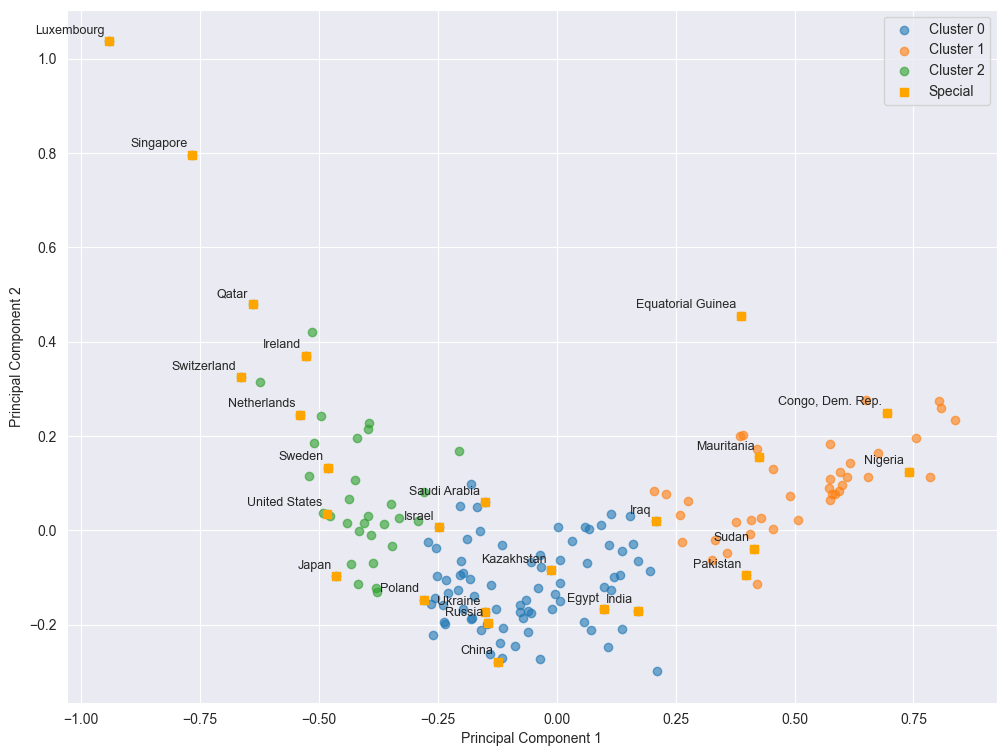

In [75]:
service.plot_clusters(
    X,
    cluster_labels=clusterer.labels_,
    labels=labels,
    special_indices=country_indices,
    text_shift=0.01,
    fontsize=9,
    figsize=(12, 9),
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
)

In [76]:
clusterers = [
    ("KMeans", KMeans(n_clusters=n_clusters, random_state=42)),
    ("KMedoids", KMedoids(n_clusters=n_clusters, random_state=42)),
    ("Aggl.(single)", AgglomerativeClustering(n_clusters=n_clusters, linkage='single')),
    ("Aggl.(complete)", AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')),
    ("Aggl.(average)", AgglomerativeClustering(n_clusters=n_clusters, linkage='average')),
    ("Aggl.(ward)", AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')),
]

In [77]:
res_df = pd.DataFrame(index=labels)
for clusterer_str, clusterer in clusterers:
    clusterer.fit(X)
    country_clusters = dict(zip(labels, clusterer.labels_))
    ukraine_cluster = country_clusters['Ukraine']
    res_df[clusterer_str] = [
        1 if country_clusters[country] == ukraine_cluster else 0
        for country in labels
    ]
res_df.insert(0, '% Occ.', round(res_df.mean(axis=1) * 100, 1))
res_df.sort_values(by=['% Occ.'], ascending=False, inplace=True)

res_df

,% Occ.,KMeans,KMedoids,Aggl.(single),Aggl.(complete),Aggl.(average),Aggl.(ward)
country,,,,,,,
Albania,100.0,1,1,1,1,1,1
Algeria,100.0,1,1,1,1,1,1
Antigua and Barbuda,100.0,1,1,1,1,1,1
Armenia,100.0,1,1,1,1,1,1
Argentina,100.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Sudan,16.7,0,0,1,0,0,0
Zambia,16.7,0,0,1,0,0,0
Uganda,16.7,0,0,1,0,0,0


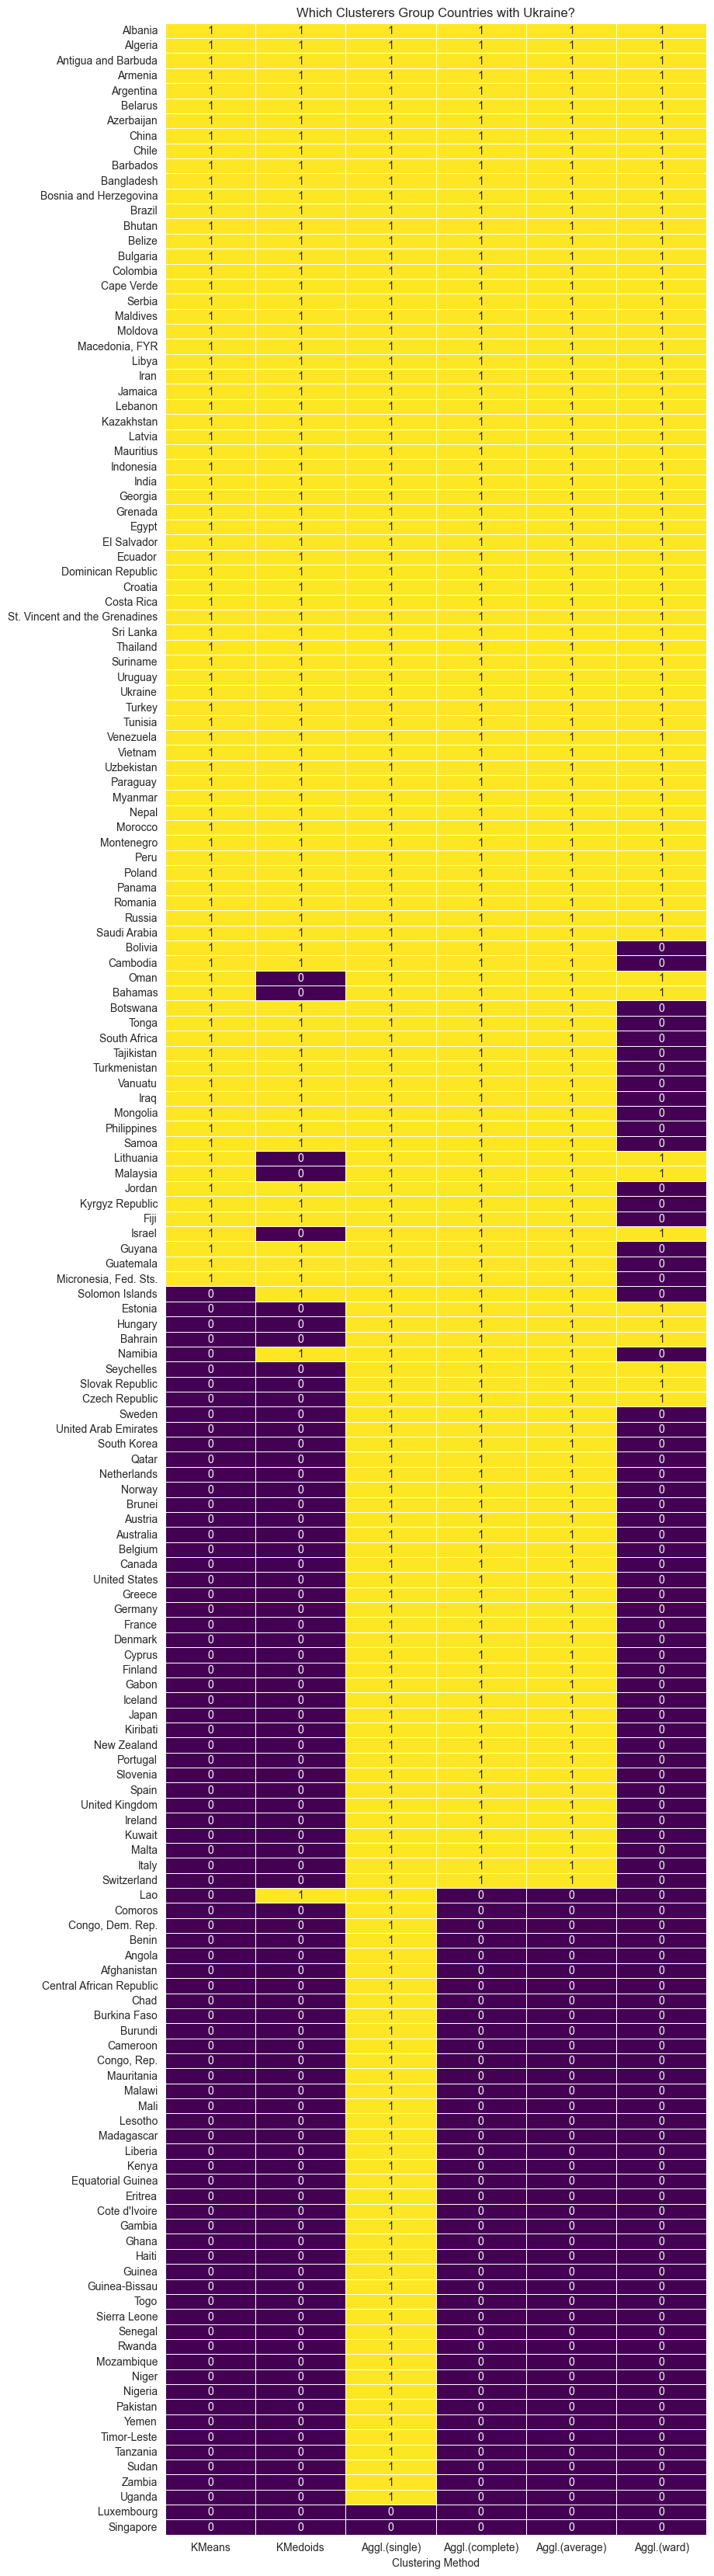

In [78]:
plt.figure(figsize=(9, 42))
sns.heatmap(
    data=res_df.drop(columns='% Occ.'),
    cmap='viridis',
    linewidths=0.5,
    annot=True,
    cbar=False,
)

plt.title("Which Clusterers Group Countries with Ukraine?")
plt.xlabel("Clustering Method")
plt.ylabel("")
plt.show()

### Check clusterers (scikit-learn)

In [79]:
clusterers = [
    KMeans(),
    KMedoids(),
    DBSCAN(),
    AgglomerativeClustering(),
]

In [80]:
from sklearn.utils.estimator_checks import estimator_checks_generator

for clusterer in clusterers:
    total_checks = 0
    for (estimator, check) in estimator_checks_generator(clusterer):
        total_checks += 1
        check(estimator)
    print(f"{clusterer}: {total_checks} checks complete.")

KMeans(): 46 checks complete.
KMedoids(): 46 checks complete.
DBSCAN(): 46 checks complete.
AgglomerativeClustering(): 46 checks complete.
